# Synchronisation procedure for Equivitals

This notebook runs through evaluating the timing correction needed for individual equivital (or movesense) device recordings to align with stimulus time (audio recording) using the tapping or clapping recorded to the triple beep synchronisation cue.

First is a test of tapping position and clapping on the musicians pilot data.


In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import heartpy as hp

from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

In [19]:
%load_ext autoreload
%autoreload 1
%aimport qex

In [20]:
%reload_ext autoreload

## Musicians pilot synchronisation

In [5]:
os.listdir('out_data')

['MusiciansPilot_Synch_Session_set_Accelerometer.csv']

In [17]:
df = pd.read_csv('out_data/MusiciansPilot_Synch_Session_set_Accelerometer.csv')
df.columns
df['DateTime'] = pd.to_datetime(df['Unnamed: 0'])
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.set_index(df['DateTime'], inplace=True)
df.drop(['DateTime'],axis=1, inplace=True)
df

,Pilot_1,Pilot_2,Bluetooth_Tester_3,Pilot_3,Pilot_4,Pilot_5,Bluetooth_Tester_1,Pilot_6,Pilot_7,Pilot_8,Pilot_9,Pilot_23
DateTime,,,,,,,,,,,,
2023-01-27 09:40:00+00:00,7.010649,47.190048,4.509801,14.532587,26.190275,16.127450,8.323943,22.019859,13.268648,314.377260,17.423825,42.228965
2023-01-27 09:40:00.040000+00:00,14.037897,48.292920,5.656854,16.753031,49.977627,12.872233,5.952135,12.918874,11.771126,112.043744,16.212168,60.819317
2023-01-27 09:40:00.080000+00:00,12.694575,54.355884,5.656854,9.134756,26.571983,18.448461,4.000000,10.231136,18.580715,66.464337,16.865834,43.572861
2023-01-27 09:40:00.120000+00:00,12.000000,44.025181,7.832567,18.814618,12.000000,8.062258,4.637252,13.414691,10.022052,60.618560,16.319297,19.680159
2023-01-27 09:40:00.160000+00:00,14.966630,32.645586,9.514527,15.886799,16.000000,14.177447,8.259170,10.304637,9.797959,42.478734,18.808876,31.524229
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27 09:41:59.800000+00:00,34.703466,7.384024,3.179487,35.864376,60.859621,8.368812,6.400000,5.504167,115.630148,9.609983,11.895463,17.183173
2023-01-27 09:41:59.840000+00:00,80.888602,23.570336,1.558846,52.000600,92.806033,4.717949,1.421170,1.641026,120.660554,5.274503,13.125000,19.186376
2023-01-27 09:41:59.880000+00:00,95.010144,19.460493,5.329387,47.843691,43.000514,8.183615,7.393450,5.743590,65.392242,6.605551,12.000000,29.943216


<AxesSubplot:xlabel='DateTime'>

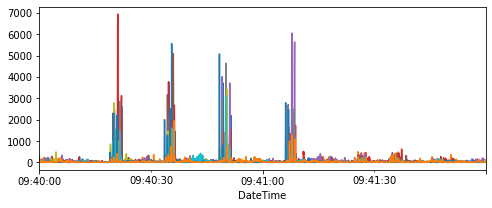

In [18]:
df.plot(legend = False,figsize = [8,3])